# Credit Card Fraud Detection
### Ell June Abucay, Veronica Bayani

Source: https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud

Context
It is important that credit card companies are able to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase.

Content
The dataset contains transactions made by credit cards in September 2013 by European cardholders.
This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.


# Libraries

In [1]:
#installing a new library
#!pip install outlier_utils
#!pip install imbalanced-learn 

In [3]:
# allows us to ignore warnings, since they are just warnings 
import warnings
warnings.filterwarnings('ignore')

# allows us to print things in jupyter in a pretty way
from IPython.display import Markdown, display
def printmd(string):
    display(Markdown(string))

# import pandas to be able to use dataframes
import pandas as pd
pd.set_option('display.float_format', lambda x: '%.6f' % x)

# import plotting library
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# allow inline plotting on notebook cells
%matplotlib inline
plt.switch_backend('agg')

# we'll get access to the numpy library
import numpy as np

# We'll use a label encoder to convert categorical feature to numerical values
from sklearn.preprocessing import LabelEncoder

# install using: pip install outlier_utils
# univariate anomaly detection
from outliers import smirnov_grubbs as grubbs

# Access to the localoutlierfactor for clustering
from sklearn.neighbors import LocalOutlierFactor

# allows us to implement a train test split strategy
from sklearn.model_selection import train_test_split

# access to the logistic regression class of Sklearn
from sklearn.linear_model import LogisticRegression

# access to the neural network model MLP Classifier
from sklearn.neural_network import MLPClassifier

# classification metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import auc
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# for use with CAP report
from scipy import integrate

# feature power transformation functions
from scipy.stats import boxcox
from scipy.special import boxcox1p

# normality tests
from scipy.stats import shapiro
from scipy.stats import normaltest
from scipy.stats import probplot

# pip install imbalanced-learn (open anaconda prompt as admin)
# sudo pip install imbalanced-learn (macos/linux)
# pip install delayed (only do this if required)
# This module is used for handling imbalanced data
from imblearn.over_sampling import SMOTE

# Collections is a core python module. We wille use counter only for reporting
from collections import Counter

In [2]:
# allows us to ignore warnings, since they are just warnings 
import warnings
warnings.filterwarnings('ignore')

# allows us to print things in jupyter in a pretty way
from IPython.display import Markdown, display
def printmd(string):
    display(Markdown(string))

# import pandas to be able to use dataframes
import pandas as pd
pd.set_option('display.float_format', lambda x: '%.6f' % x)

# import plotting library
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# allow inline plotting on notebook cells
%matplotlib inline

# we'll get access to the numpy library
import numpy as np

# We'll use a label encoder to convert categorical feature to numerical values
from sklearn.preprocessing import LabelEncoder

# install using: pip install outlier_utils
# univariate anomaly detection
from outliers import smirnov_grubbs as grubbs

# Access to the localoutlierfactor for clustering
from sklearn.neighbors import LocalOutlierFactor

# allows us to implement a train test split strategy
from sklearn.model_selection import train_test_split

# access to the logistic regression class of Sklearn
from sklearn.linear_model import LogisticRegression

# access to the neural network model MLP Classifier
from sklearn.neural_network import MLPClassifier

# classification metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import auc
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# feature power transformation functions
from scipy.stats import boxcox
from scipy.special import boxcox1p

# normality tests
from scipy.stats import shapiro
from scipy.stats import normaltest
from scipy.stats import probplot

# Exploration

In [4]:
#Importing the dataset from https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud
data_df = pd.read_csv('creditcard.csv')

In [5]:
data_df.shape

(284807, 31)

In [6]:
data_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.000000,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.620000,0
1,0.000000,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.690000,0
2,1.000000,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.660000,0
3,1.000000,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.500000,0
4,2.000000,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.990000,0


The definitions of the columns are as follows:
- Time - contains the seconds elapsed between each transaction and the first transaction in the dataset
- V1 to V28 - principal components obtained with PCA
- Amount - transaction amount
- Class - response variable and it takes value 1 in case of fraud and 0 otherwise

In [7]:
# Let's have a quick view of the dataset
tmp_df = data_df.head(1).T
tmp_df.columns = ['sample']
tmp_df['dtypes'] = data_df.dtypes
tmp_df

,sample,dtypes
Time,0.000000,float64
V1,-1.359807,float64
V2,-0.072781,float64
V3,2.536347,float64
V4,1.378155,float64
V5,-0.338321,float64
V6,0.462388,float64
V7,0.239599,float64
V8,0.098698,float64
V9,0.363787,float64


In [8]:
# Do we have rows that have any null values?
data_df.isnull().values.any()

False

There are no rows with null values.

In [9]:
col = 'Class'
series = data_df[col]
tmp_df = pd.DataFrame(series.value_counts())
tmp_df = tmp_df.T


tmp_df.plot.bar(title=col,cmap="viridis")
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)
plt.show()

In [10]:
# There is a large imbalance between the two classes
display(tmp_df)

,0,1
Class,284315,492


Out of the 284807 entries in the dataset, only 492 or 0.17% of the data set is tagged as fraudulent.

### Checking the Non-Fraud Data

In [10]:
#Getting the details for the non-fraud data (class =0)
tmp_df0=data_df[data_df['Class']==0]
tmp_df0[['Amount']].describe()

,Amount
count,284315.000000
mean,88.291022
std,250.105092
min,0.000000
25%,5.650000
50%,22.000000
75%,77.050000
max,25691.160000


In [11]:
import matplotlib.pyplot as plt
import numpy as np

#Checking to see if there are outliers in the non-fraud data

# Creating plot
plt.boxplot(tmp_df0[['Amount']])
 
# show plot
plt.show()

#There are many outliers in the non-fraud data

In [12]:
# Creating histogram for the non-fraud data
fig, ax = plt.subplots(figsize =(10, 7))
ax.hist(tmp_df0[['Amount']])
plt.xlabel("Transaction Amount")
plt.ylabel("Transaction Count")
plt.title('Histogram of Transaction Amounts for Non-Fraud Data')

# Show plot
plt.show()

### Checking the Fraud Data

In [13]:
#Getting the details for the fraud data (class =1)
tmp_df1=data_df[data_df['Class']==1]
tmp_df1[['Amount']].describe()

,Amount
count,492.000000
mean,122.211321
std,256.683288
min,0.000000
25%,1.000000
50%,9.250000
75%,105.890000
max,2125.870000


In [14]:
#Checking to see if there are outliers in the fraud data

# Creating plot
plt.boxplot(tmp_df1[['Amount']])
 
# show plot
plt.show()

#There are many outliers in the fraud data

In [15]:
# Creating histogram for the fraud data
fig, ax = plt.subplots(figsize =(10, 7))
ax.hist(tmp_df1[['Amount']])
plt.xlabel("Transaction Amount")
plt.ylabel("Transaction Count")
plt.title('Histogram of Transaction Amounts for the Fraud Data')

# Show plot
plt.show()

### Interpretation

The mean transaction amount for the fraud dataset is 122 which is lower than the mean transaction amount of the non-fraud dataset at 88. It means that the average amount of fraud transactions is higher than the average amount of the non-fraud/regular transactions. 

In terms of the maximum amount, the maximum amount of the fraud transaction is 2125 which is smaller than the maximum amount of the non-fraud transaction at 25691. This means that even if the average amount of fraudulent transactions are higher, the maximum amount is still lower than the maximum amount for non-fraud transactions.

There are outliers for both fraud and non-fraud transactions and, in the histograms, both fraud and non-fraud transactions have higher frequencies of lower amounts.

## Anomaly Detection

### via Clustering

Unsupervised Outlier Detection using Local Outlier Factor (LOF)

The anomaly score of each sample is called Local Outlier Factor. It measures the local deviation of density of a given sample with respect to its neighbors. It is local in that the anomaly score depends on how isolated the object is with respect to the surrounding neighborhood. More precisely, locality is given by k-nearest neighbors, whose distance is used to estimate the local density. By comparing the local density of a sample to the local densities of its neighbors, one can identify samples that have a substantially lower density than their neighbors. These are considered outliers.

In [18]:
y = data_df.Class
X = data_df.drop(['Class'],axis=1)

In [50]:
%%time

lof_model = LocalOutlierFactor(n_neighbors=2)
y_pred = lof_model.fit_predict(X)


Wall time: 20min 16s


In [51]:
# lof works by tagging inliers with 1 and outliers by -1
y_pred

array([ 1,  1, -1, ...,  1, -1,  1])

In [52]:
# Let's see how many outliers our unsupervised model detected (outliers are tagged as -1)

tmp_df = pd.DataFrame(y_pred)
tmp_df.value_counts()

 1    267076
-1     17731
dtype: int64

Negative_outlier_factor_ is the opposite LOF of the training samples. The higher, the more normal. Inliers tend to have a LOF score close to 1 (negative_outlier_factor_ close to -1), while outliers tend to have a larger LOF score.

Another interpretation is that negative_outlier_factor_ can be an indicator on how 'far' the outlier is from the neighborhood densities.

In [53]:
lof_model.negative_outlier_factor_

array([-0.98442703, -0.95434346, -1.50888693, ..., -0.93621642,
       -1.90162771, -1.05667335])

This demonstrates that we can use an unsupervised modeling approach to fraud detection in the event that we do not have yet substantial data on caught fraudsters. It is a good starting point to build our way towards building supervised models.

### via Grubbs Test

Grubbs’ Test is used to identify the presence of outliers in a dataset. To use this test, a dataset should be approximately normally distributed and have at least 7 observations. Grubbs's test is based on the assumption of normality. That is, one should first verify that the data can be reasonably approximated by a normal distribution before applying the Grubbs test.

'Before'

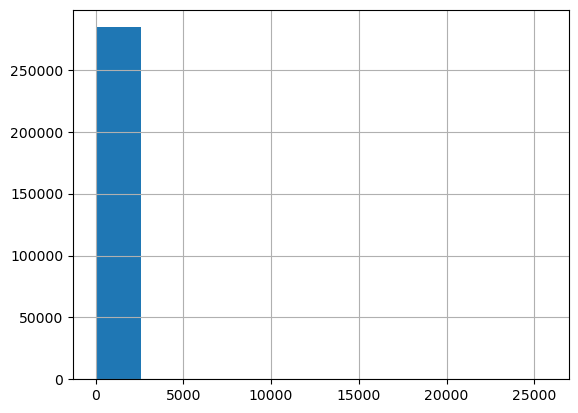

'After'

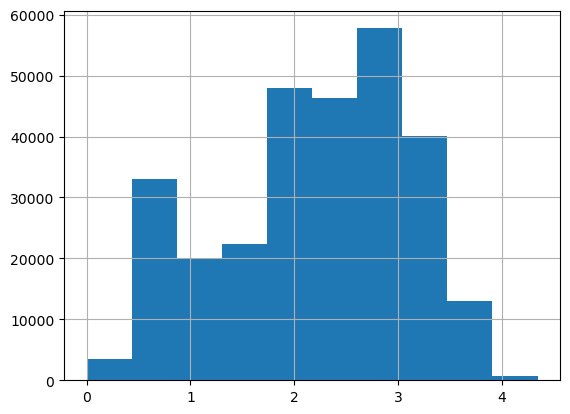

In [19]:
# we will look at two classes of techniques for checking whether a sample of data is Gaussian:

# Graphical Methods. These are methods for plotting the data and qualitatively evaluating whether the data looks Gaussian.
# Statistical Tests. These are methods that calculate statistics on the data and quantify how likely it is that
# the data was drawn from a Gaussian distribution. Methods of this type are often called normality tests.

# via Graphical - We assume that plotting our data set would result to what would look like a 'normal' distribution

# histogram - is an approximate representation of the distribution of numerical data

series_tmp = data_df['Amount'].copy()
display("Before")
series_tmp.hist()
plt.show()
# you can see here that our distribution skews to the left which is different to the bellcurve of a normal/gaussian distribution

# To address this, we use a power transformation and try to make our dataset look normal/gaussian
# The Boxcox function accepts a lambda parameter that dictates what transformation to do
# In this case a lambda value of 0 means it will do a log transformation to all of the data set
boxcox_series_tmp = pd.Series(boxcox1p(series_tmp,-0.2))
display("After")
boxcox_series_tmp.hist()
plt.show()

# You can see here that our data set is now more 'gaussian' like

'Before'

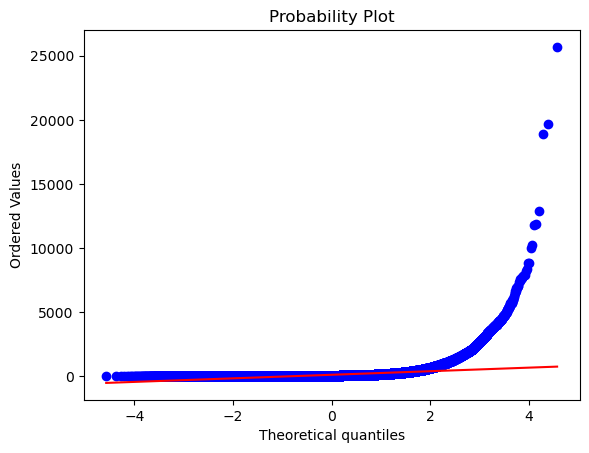

'After'

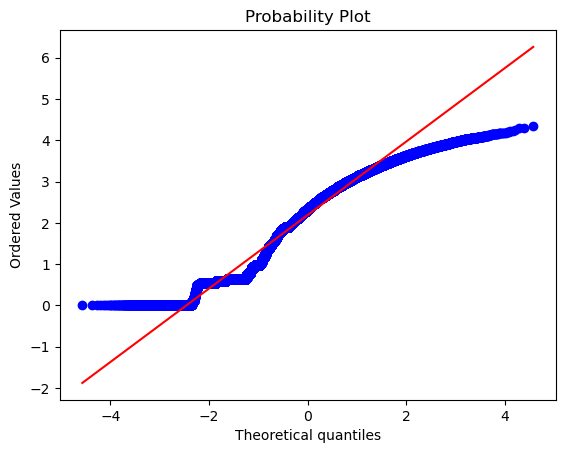

In [20]:
# The Q-Q plot, or quantile-quantile plot, is a graphical tool to help us assess if
# a set of data plausibly came from some theoretical distribution such as a Normal or exponential. 

display("Before")
probplot(series_tmp, dist="norm", plot=plt)
plt.show()

# You can see that our data set does not completely fit our plot, so we apply the same power transformation

display("After")

probplot(boxcox_series_tmp, dist="norm", plot=plt)
plt.show()

# We plot the data set again and see a minor visual improvements to the qq plot


In [21]:
# The next tests validate by generating a statistic called p value 
# Technically this is called the null hypothesis, or H0. A threshold level is chosen called alpha, 
# typically 5% (or 0.05), that is used to interpret the p-value.

# In the SciPy implementation of these tests, you can interpret the p value as follows.

# p <= alpha: reject H0, not normal.
# p > alpha: fail to reject H0, normal.



print("Using Shapiro Normality Test")
print("Before: ")
print(shapiro(series_tmp))

print("After")
print(shapiro(boxcox_series_tmp))

# The Shapiro-Wilk test evaluates a data sample and quantifies how likely it is that the data was drawn from a
# Gaussian distribution, named for Samuel Shapiro and Martin Wilk.

print("")

print("Using D’Agostino’s K^2 Normality Test")
print("Before: ")
print(normaltest(series_tmp))

print("After")
print(normaltest(boxcox_series_tmp))


# The normal test AKA D’Agostino’s K^2 test calculates summary statistics from the data, namely kurtosis and skewness,
# to determine if the data distribution departs from the normal distribution, named for Ralph D’Agostino.

Using Shapiro Normality Test
Before: 
ShapiroResult(statistic=0.31006085872650146, pvalue=0.0)
After
ShapiroResult(statistic=0.9587987661361694, pvalue=0.0)

Using D’Agostino’s K^2 Normality Test
Before: 
NormaltestResult(statistic=588235.0121540151, pvalue=0.0)
After
NormaltestResult(statistic=27909.42584858108, pvalue=0.0)


Our statistical tests are telling us that our data set it not normally distributed, because of the resulting pvalue below .05 threshold despite our power transformations. On the other hand our graphical tests tells us that our data after the transformations are a bit more gaussian /normal like. No tests are perfect as well as no data is in reality 'completely' normally distributed. We can use this as decision point to move forward and treat our data set as gaussian like.

In [29]:
# test for normality first
# transform to normal / guassian distribution to fit  if normality test fails
# run grubb's test

print("Our transformed data set length count: ")
print(len(boxcox_series_tmp))
grubbs_result = grubbs.test(boxcox_series_tmp, alpha=0.05)

print("Our Grubbs test result length count: ")
print(len(grubbs_result))

print("Grubs test works by returning the dataset and removing the anomalies, since the transformed data and the Grubbs test result is the same then we found no anomaly in the dataset")

Our transformed data set length count: 
284807
Our Grubbs test result length count: 
284807
Grubs test works by returning the dataset and removing the anomalies, since the transformed data and the Grubbs test result is the same then we found no anomaly in the dataset


# SMOTE for oversampling
SMOTE stands for Synthetic Minority Oversampling Technique. This is a statistical technique for increasing the number of cases in your dataset in a balanced way.

Since our fraud dataset is imbalanced (low fraud cases), we will use oversampling to try to 'balance' the classes. This will results to more robust trained models that would be less prone to under or overfitting due to under or over representation.

In [19]:
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

In [20]:
# summarize the new class distribution
counter = Counter(y)
print(counter)

Counter({0: 284315, 1: 284315})


# Logistic Regression

As our base model we will use a simple logistic regression as our starting point for developing our predictive model.

### Using the SMOTE Oversampled Data

In [23]:
# here we do a few things: 1) separate our data set into 30% and 70% splits
# 70% will be used for as training data set
# 30% will be used to test the resulting model
# X represents our features
# y represents our target variable (1 is fraud)
import random
random.seed(123)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
columns = X.columns 
# we keep the column names to be used later

# Base model using all variables
logreg_model = LogisticRegression(random_state=0)

# Let's input our training data set and fit our model
logreg_model.fit(X_train, y_train)

LogisticRegression(random_state=0)

### Using the original data (for comparison purposes later)

In [24]:
yo = data_df.Class
yo.head()

0    0
1    0
2    0
3    0
4    0
Name: Class, dtype: int64

In [25]:
Xo = data_df.drop(['Class'],axis=1)
Xo.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.000000,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.620000
1,0.000000,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.690000
2,1.000000,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.660000
3,1.000000,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.500000
4,2.000000,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.990000


In [26]:
# here we do a few things: 1) separate our data set into 30% and 70% splits
# 70% will be used for as training data set
# 30% will be used to test the resulting model
# X represents our features
# y represents our target variable (1 is fraud)

Xo_train, Xo_test, yo_train, yo_test = train_test_split(Xo, yo, test_size=0.3, random_state=0)
columns = X.columns 
# we keep the column names to be used later

# Base model using all variables
logreg_model = LogisticRegression(random_state=0)

# Let's input our training data set and fit our model
logreg_model.fit(Xo_train, yo_train)

LogisticRegression(random_state=0)

# Quick review of feature importance
Using our trained logistic regression model, we will extract the computed coefficients and use that as basis for reporting the the effect of each feature to with respect to predicting the classification. A positive indicates the likelihood to result to a 1 while a negative value a 0. The value indicates the degree of impact to the classification.

In [28]:
importance = logreg_model.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d - %s, Score: %.6f' % (i,columns[i],v))

# plot feature importance
plt.bar([columns[x] for x in range(len(importance))], importance)
plt.xticks(rotation=90)
plt.show()

Feature: 0 - Time, Score: -0.000096
Feature: 1 - V1, Score: 0.601370
Feature: 2 - V2, Score: -0.870816
Feature: 3 - V3, Score: -0.859442
Feature: 4 - V4, Score: 0.199180
Feature: 5 - V5, Score: 0.200135
Feature: 6 - V6, Score: -0.105278
Feature: 7 - V7, Score: 0.337658
Feature: 8 - V8, Score: -0.399036
Feature: 9 - V9, Score: -0.676273
Feature: 10 - V10, Score: -0.445535
Feature: 11 - V11, Score: -0.191982
Feature: 12 - V12, Score: -0.051718
Feature: 13 - V13, Score: -0.481829
Feature: 14 - V14, Score: -1.264364
Feature: 15 - V15, Score: -0.415536
Feature: 16 - V16, Score: -0.495216
Feature: 17 - V17, Score: -0.927720
Feature: 18 - V18, Score: -0.075374
Feature: 19 - V19, Score: 0.078571
Feature: 20 - V20, Score: 0.056166
Feature: 21 - V21, Score: 0.324031
Feature: 22 - V22, Score: 0.357750
Feature: 23 - V23, Score: 0.053023
Feature: 24 - V24, Score: -0.022691
Feature: 25 - V25, Score: -0.335252
Feature: 26 - V26, Score: 0.063994
Feature: 27 - V27, Score: -0.080536
Feature: 28 - V28, S

### Interpretation

The top 3 variables with the greatest impact on whether a transaction will be fraudulent or not are V14, V3 and V4. Due to the confidential nature of the credit card transactions, we don't have information on what these PCA profiles are however what we know is that if the V14 and V3 values are high, then the transactions are not likely to be fraudulent. The opposite is true for V4 where if the V4 value is high, then the transaction is likely to be fraudulent.

# Let's predict

### Predictions for the SMOTE Oversampled Data

In [35]:
# predict against X_test
y_pred = logreg_model.predict(X_test)
y_pred

array([1, 1, 1, ..., 1, 0, 1], dtype=int64)

In [36]:
# Let's save our results in a variable for later use
y_pred_lr = y_pred

# How did our logistic regression perform?

print("accuracy: ",accuracy_score(y_test,y_pred_lr))
print("precision_score: ",precision_score(y_test,y_pred_lr))
print("recall_score: ",recall_score(y_test,y_pred_lr))
print("confusion matrix: ")
confusion_matrix(y_test,y_pred_lr)

accuracy:  0.9722021935763736
precision_score:  0.9793580434705106
recall_score:  0.9648196494842947
confusion matrix: 


array([[83435,  1737],
       [ 3005, 82412]], dtype=int64)

### Predictions for the original dataset

In [59]:
# predict against X_test
yo_pred = logreg_model.predict(Xo_test)
yo_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [60]:
# Let's save our results in a variable for later use
yo_pred_lr = yo_pred

# How did our logistic regression perform?

print("accuracy: ",accuracy_score(yo_test,yo_pred_lr))
print("precision_score: ",precision_score(yo_test,yo_pred_lr))
print("recall_score: ",recall_score(yo_test,yo_pred_lr))
print("confusion matrix: ")
confusion_matrix(yo_test,yo_pred_lr)

accuracy:  0.999133925541004
precision_score:  0.7703703703703704
recall_score:  0.7074829931972789
confusion matrix: 


array([[85265,    31],
       [   43,   104]], dtype=int64)

### Comparison of the prediction metrics for the SMOTE Oversampled and the Original Dataset

The original dataset represents the real world (not oversampled data). Logistic regression in the original dataset has a higher accuracy which is expected since 99.828% of the transactions in the original dataset are non-fraudulent. However, the original dataset has a lower precision (77%) and a lower recall score (71%). Nevertheless, we think that this is good enough considering that the instance of fraud in the original dataset is only 0.172% of the total transactions.

Predictions using the oversampled data has a higher precision and recall which is expected since the distribution of the fraud/non-fraud transactions in the oversampled data is 50-50.

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.972


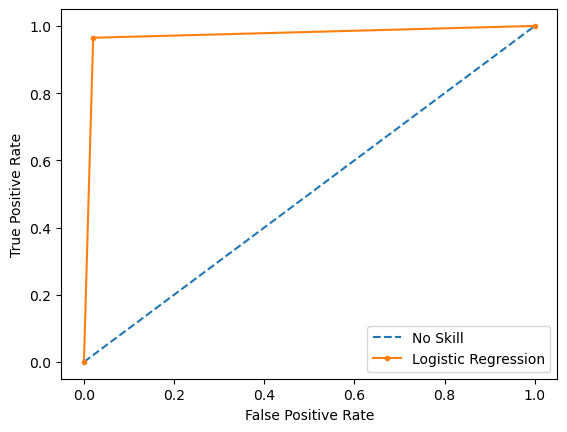

In [37]:
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_test))]
lr_probs = y_pred_lr
# keep probabilities for the positive outcome only
#lr_probs = lr_probs[:, 1]

# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic Regression')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

The performance of the logistic regression is actually very good since it has a high ROC score of 0.972. This means that logistic regression was able to come up with a good separation between the fraud/non-fraud transactions. We will use the logistic regression ROC score later in comparison with the other methods.

# Neural Network

As our base model we will use a simple logistic regression as our starting point for developing our predictive model.

In [38]:
%%time 

# Class MLPClassifier implements a multi-layer perceptron (MLP) algorithm that trains using Backpropagation.



nn_model = MLPClassifier(random_state=0)

nn_model.fit(X_train, y_train)


Wall time: 7min 46s


MLPClassifier(random_state=0)

In [39]:
# predict against X_test
y_pred = nn_model.predict(X_test)
y_pred

array([1, 1, 1, ..., 1, 0, 1], dtype=int64)

In [40]:
# Let's save our results in a variable for later use
y_pred_nn = y_pred

# How did our neural network model perform?

print("accuracy: ",accuracy_score(y_test,y_pred_nn))
print("precision_score: ",precision_score(y_test,y_pred_nn))
print("recall_score: ",recall_score(y_test,y_pred_nn))
print("confusion matrix: ")
confusion_matrix(y_test,y_pred_nn)

accuracy:  0.9794652644660559
precision_score:  0.9917987512007685
recall_score:  0.9669854946907525
confusion matrix: 


array([[84489,   683],
       [ 2820, 82597]], dtype=int64)

No Skill: ROC AUC=0.500
Neural Network: ROC AUC=0.979


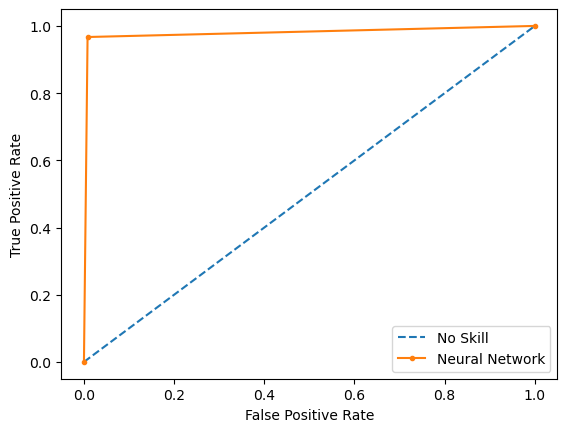

In [41]:
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_test))]
lr_probs = y_pred_nn

# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Neural Network: ROC AUC=%.3f' % (lr_auc))

# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Neural Network')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

The performance of the neural network with an ROC score of 0.979 is better than the performance of the logistic regression model with an ROC score of 0.972. Neural networks also have a higher accuracy, precision and recall scores as compared to logistic regression models. This means that neural networks will be able to make a better prediction on fraud/non-fraud transactions.

# Revised Neural Network

Let's remodel the Neural Network but this time, let's filter out the features with absolute importance values less than 0.1 namely V22, V2, V20, V8, V19, V25, V5, V27, V28, V23, V26, V24, Time and Amount since based on the feature importance review, these features contributed least to the predicting factor of the model.

In [64]:
# Let's remove the features and create our revised train test dataset
revised_X = X.drop(['V22', 'V2', 'V20', 'V8', 'V19', 'V25', 'V5', 'V27', 'V28', 'V23', 'V26', 'V24', 'Time', 'Amount'], axis=1)
revised_X_train, revised_X_test, y_train, y_test = train_test_split(revised_X, y, test_size=0.3, random_state=0)

In [65]:
%%time 

# Class MLPClassifier implements a multi-layer perceptron (MLP) algorithm that trains using Backpropagation.



revised_nn_model = MLPClassifier(random_state=0)

revised_nn_model.fit(revised_X_train, y_train)


Wall time: 1min


MLPClassifier(random_state=0)

In [66]:
# predict against X_test
y_pred = revised_nn_model.predict(revised_X_test)
y_pred

array([1, 1, 1, ..., 1, 0, 1], dtype=int64)

In [67]:
# Let's save our results in a variable for later use
y_pred_revised_nn = y_pred

# How did our neural network model perform?

print("accuracy: ",accuracy_score(y_test,y_pred_revised_nn))
print("precision_score: ",precision_score(y_test,y_pred_revised_nn))
print("recall_score: ",recall_score(y_test,y_pred_revised_nn))
print("confusion matrix: ")
confusion_matrix(y_test,y_pred_revised_nn)

accuracy:  0.9995720708838202
precision_score:  0.9992628992628992
recall_score:  0.9998829272861374
confusion matrix: 


array([[85109,    63],
       [   10, 85407]], dtype=int64)

No Skill: ROC AUC=0.500
Neural Network: ROC AUC=1.000


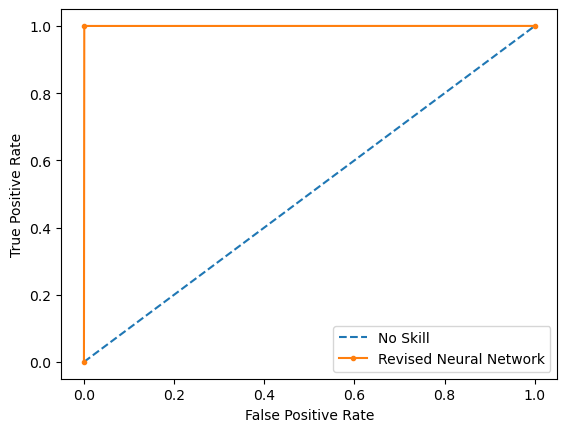

In [68]:
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_test))]
lr_probs = y_pred_revised_nn

# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Neural Network: ROC AUC=%.3f' % (lr_auc))

# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Revised Neural Network')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

## Summary of the Accuracy, Precision, Recall and ROC AUC for the different models

In [69]:
tmp_list = []
tmp_dict = {"accuracy":accuracy_score(y_test,y_pred_lr), "precision":precision_score(y_test,y_pred_lr), "recall":recall_score(y_test,y_pred_lr),"roc auc": roc_auc_score(y_test,y_pred_lr)}
tmp_list.append(tmp_dict)
tmp_dict = {"accuracy":accuracy_score(y_test,y_pred_nn), "precision":precision_score(y_test,y_pred_nn), "recall":recall_score(y_test,y_pred_nn),"roc auc":roc_auc_score(y_test,y_pred_nn)}
tmp_list.append(tmp_dict)
tmp_dict = {"accuracy":accuracy_score(y_test,y_pred_revised_nn), "precision":precision_score(y_test,y_pred_revised_nn), "recall":recall_score(y_test,y_pred_revised_nn),"roc auc":roc_auc_score(y_test,y_pred_revised_nn)}
tmp_list.append(tmp_dict)

scores_df = pd.DataFrame(tmp_list)
scores_df.index = ['LogisticRegression','NeuralNetworks','RevisedNeuralNetworks']
scores_df

,accuracy,precision,recall,roc auc
LogisticRegression,0.972202,0.979358,0.964820,0.972213
NeuralNetworks,0.979465,0.991799,0.966985,0.979483
RevisedNeuralNetworks,0.999572,0.999263,0.999883,0.999572


### Interpretation

The best performing model is the revised neural network with the best values for the accuracy, precision, recall and roc auc. We'd recommend using this to detect fraudulent credit card transactions since it has the highest accuracy, precision and recall as compared to the other models. 

Credit card transactions are usually have a high volume which means when investigating fraudulent activities, we want a model with a high accuracy, precision and recall to limit the capture of false positives and hence control the cost of investigating fraud (which is normally high) and to minimize the impact to our customers.

## Cumulative Accuracy Profile (CAP) or Lorenz Curve

CAP popularly called the ‘Cumulative Accuracy Profile’ is used in the performance evaluation of the classification model. It helps us to understand and conclude about the robustness of the classification model. 

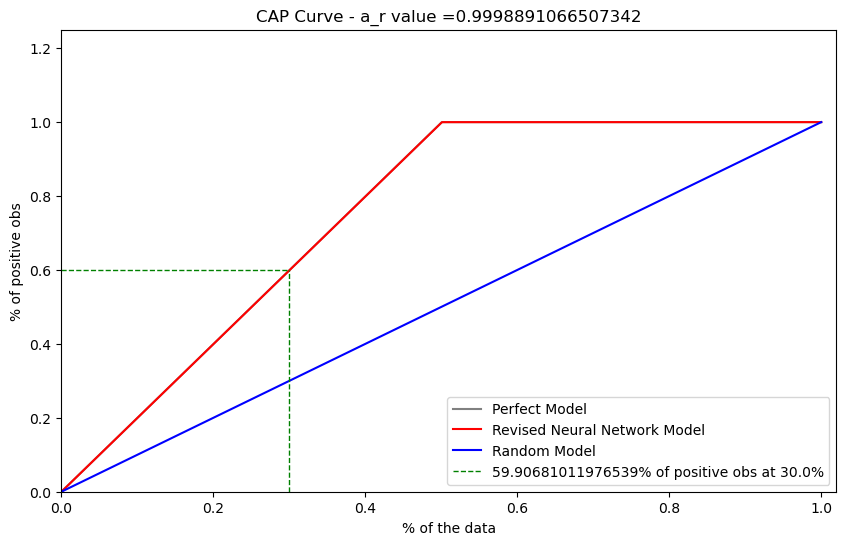

In [70]:


def capcurve(y_values, y_preds_proba):
    num_pos_obs = np.sum(y_values)
    num_count = len(y_values)
    rate_pos_obs = float(num_pos_obs) / float(num_count)
    ideal = pd.DataFrame({'x':[0,rate_pos_obs,1],'y':[0,1,1]})
    xx = np.arange(num_count) / float(num_count - 1)
    
    y_cap = np.c_[y_values,y_preds_proba]
    y_cap_df_s = pd.DataFrame(data=y_cap)
    y_cap_df_s = y_cap_df_s.sort_values([1], ascending=False).reset_index(level = y_cap_df_s.index.names, drop=True)
    
    #print(y_cap_df_s.head(20))
    
    yy = np.cumsum(y_cap_df_s[0]) / float(num_pos_obs)
    yy = np.append([0], yy[0:num_count-1]) #add the first curve point (0,0) : for xx=0 we have yy=0
    
    percent = 0.3
    row_index = int(np.trunc(num_count * percent))
    
    val_y1 = yy[row_index]
    val_y2 = yy[row_index+1]
    if val_y1 == val_y2:
        val = val_y1*1.0
    else:
        val_x1 = xx[row_index]
        val_x2 = xx[row_index+1]
        val = val_y1 + ((val_x2 - percent)/(val_x2 - val_x1))*(val_y2 - val_y1)
    
    sigma_ideal = 1 * xx[num_pos_obs - 1 ] / 2 + (xx[num_count - 1] - xx[num_pos_obs]) * 1
    sigma_model = integrate.simps(yy,xx)
    sigma_random = integrate.simps(xx,xx)
    
    ar_value = (sigma_model - sigma_random) / (sigma_ideal - sigma_random)
    
    fig = plt.figure(figsize=(10, 6))
    ax = fig.subplots(nrows = 1, ncols = 1)

    
    ax.plot(ideal['x'],ideal['y'], color='grey', label='Perfect Model')
    ax.plot(xx,yy, color='red', label='Revised Neural Network Model')
    ax.plot(xx,xx, color='blue', label='Random Model')
    ax.plot([percent, percent], [0.0, val], color='green', linestyle='--', linewidth=1)
    ax.plot([0, percent], [val, val], color='green', linestyle='--', linewidth=1, label=str(val*100)+'% of positive obs at '+str(percent*100)+'%')
    
    plt.xlim(0, 1.02)
    plt.ylim(0, 1.25)
    plt.title("CAP Curve - a_r value ="+str(ar_value))
    plt.xlabel('% of the data')
    plt.ylabel('% of positive obs')
    plt.legend()
    plt.show()

    
# Let's store the pred probability for use later when we call the CAP function
revised_y_pred_proba = revised_nn_model.predict_proba(X=revised_X_test)

# Let's cal lthe cap curve function. What does this is pass the y_test (which contains our target classification
# as well as the predicted probabilities. The intention is to chart our CAP and see what is the optimal approach to 
# acting on our scored transaction list 
capcurve(y_test,revised_y_pred_proba[:,1])

The CAP curve of the revised neural network tells us that even if we only investigate 50% of the scored transaction list, we will be able to detect almost 100% of all fraudulent cases.

In [71]:
# Let's create our white list. This white list will be the list of transactions that we will spend resources to investigate
# as they are the most probable fraud cases based on our revised neural network model

save_whitelist_df = revised_X_test.copy() # Let's create a dataframe of the test dataset
save_whitelist_df['y_pred_proba'] = revised_y_pred_proba[:,1] # store the probability to be a fraud case
save_whitelist_df['y_pred'] = y_pred_nn # add the predictions of our revised neural network
save_whitelist_df = save_whitelist_df.sort_values('y_pred_proba',ascending=False) # sort with highest to lowest probability

In [72]:
# Let's get our cut off and filter to the final list and save to a CSV File

percentage = .49 # Let's use 49% since based on the chart we already hit the optimal cutoff before 50%
cutoff = int(save_whitelist_df.shape[0]*percentage) # will get the absolute count of 49% of total rows
print("Our cutoff value is ", cutoff)
save_whitelist_df = save_whitelist_df[0:cutoff] # we filter until the cutoff
save_whitelist_df.to_csv("fraud_revised_nn.csv") # Filter only to the predcted and save our CSV file
print("We predict ",save_whitelist_df['y_pred'].sum(), " fraud cases out of ", revised_X_test.shape[0], " transactions.")
save_whitelist_df.head()

Our cutoff value is  83588
We predict  81726  fraud cases out of  170589  transactions.


,V1,V3,V4,V6,V7,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V21,y_pred_proba,y_pred
541427,-16.463155,-17.850317,10.836184,-0.228555,-21.970736,-7.938872,-15.302678,5.234537,-13.229251,0.038903,-7.076804,-0.971426,-8.535293,-15.151035,-5.698711,-4.083018,1.000000,1
300572,-0.695058,-7.615327,7.166106,-2.445663,-2.762596,-3.992676,-5.006493,3.972826,-5.777562,0.401435,-11.318441,0.487404,-1.747486,-1.542053,0.228358,0.444981,1.000000,1
290633,-21.744940,-22.851081,8.164585,-0.174861,-28.170050,-9.366372,-20.499065,4.790801,-12.093282,-1.406350,-4.620895,-2.780488,-8.814266,-15.378852,-6.584593,-8.915521,1.000000,1
554439,-17.449663,-24.186868,11.806109,-2.577802,-17.644779,-6.242896,-12.833477,9.446747,-13.553048,0.958722,-13.036728,-0.425874,-7.655989,-11.490552,-4.722023,-2.328290,1.000000,1
524313,0.613198,-5.859876,5.902186,-1.458054,-2.617201,-3.382391,-4.701175,4.858671,-5.174651,0.469166,-10.437336,-1.291417,-2.119709,-5.059790,-1.027142,0.350467,1.000000,1


## References:

Link to Kaggle Credit Card Fraud Detection dataset: https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud

#### Acknowledgements (taken from Kaggle)

The dataset has been collected and analysed during a research collaboration of Worldline and the Machine Learning Group (http://mlg.ulb.ac.be) of ULB (Université Libre de Bruxelles) on big data mining and fraud detection.
More details on current and past projects on related topics are available on https://www.researchgate.net/project/Fraud-detection-5 and the page of the DefeatFraud project

Andrea Dal Pozzolo, Olivier Caelen, Reid A. Johnson and Gianluca Bontempi. Calibrating Probability with Undersampling for Unbalanced Classification. In Symposium on Computational Intelligence and Data Mining (CIDM), IEEE, 2015

Dal Pozzolo, Andrea; Caelen, Olivier; Le Borgne, Yann-Ael; Waterschoot, Serge; Bontempi, Gianluca. Learned lessons in credit card fraud detection from a practitioner perspective, Expert systems with applications,41,10,4915-4928,2014, Pergamon

Dal Pozzolo, Andrea; Boracchi, Giacomo; Caelen, Olivier; Alippi, Cesare; Bontempi, Gianluca. Credit card fraud detection: a realistic modeling and a novel learning strategy, IEEE transactions on neural networks and learning systems,29,8,3784-3797,2018,IEEE

Dal Pozzolo, Andrea Adaptive Machine learning for credit card fraud detection ULB MLG PhD thesis (supervised by G. Bontempi)

Carcillo, Fabrizio; Dal Pozzolo, Andrea; Le Borgne, Yann-Aël; Caelen, Olivier; Mazzer, Yannis; Bontempi, Gianluca. Scarff: a scalable framework for streaming credit card fraud detection with Spark, Information fusion,41, 182-194,2018,Elsevier

Carcillo, Fabrizio; Le Borgne, Yann-Aël; Caelen, Olivier; Bontempi, Gianluca. Streaming active learning strategies for real-life credit card fraud detection: assessment and visualization, International Journal of Data Science and Analytics, 5,4,285-300,2018,Springer International Publishing

Bertrand Lebichot, Yann-Aël Le Borgne, Liyun He, Frederic Oblé, Gianluca Bontempi Deep-Learning Domain Adaptation Techniques for Credit Cards Fraud Detection, INNSBDDL 2019: Recent Advances in Big Data and Deep Learning, pp 78-88, 2019

Fabrizio Carcillo, Yann-Aël Le Borgne, Olivier Caelen, Frederic Oblé, Gianluca Bontempi Combining Unsupervised and Supervised Learning in Credit Card Fraud Detection Information Sciences, 2019

Yann-Aël Le Borgne, Gianluca Bontempi Reproducible machine Learning for Credit Card Fraud Detection - Practical Handbook

Bertrand Lebichot, Gianmarco Paldino, Wissam Siblini, Liyun He, Frederic Oblé, Gianluca Bontempi Incremental learning strategies for credit cards fraud detection, IInternational Journal of Data Science and Analytics